In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import random 
import scipy.stats
import pandas as pd
import bases
import preprocessing
import glm_utils

In [2]:
exptList = glob.glob(r'/run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/eDNA/behavior/test_for_glm/*')

In [3]:
ftrList = [os.path.basename(i).split('.csv')[0] for i in glob.glob(rf'{exptList[0]}/*2.csv')]
ftrList.extend(['pulse', 'sine'])
# ftrList.extend(['distance_male_head_to_female_abdomen', 'pulse', 'sine'])

In [4]:
r2_score = {}
accuracy = {}
logloss = {}
filterShapes = {}
filterNorms = {}

for ftr in ftrList:
    if ftr=='OEL2':
        continue
    x, y = glm_utils.design(exptList, ftr, 1500)

    if x.ndim==3:
        x = x.squeeze()
    
    results = glm_utils.pcor(x, y, 1500)
    r2_score[ftr] = results['r2_score']
    accuracy[ftr] = results['fraction_correct']
    filterShapes[ftr] = results['filtershape']
    filterNorms[ftr] = results['filter_norms']
    logloss[ftr] = results['logloss']

shape of x: (407, 1500, 1)
shape of y: (407,)


KeyboardInterrupt: 

In [7]:
len(np.argwhere(y==1))

60

In [20]:
import seaborn as sns

In [32]:
def dict2df(data):
    keys = data.keys()
    df = pd.DataFrame(columns=['feature', 'value'])
    for key in keys:
        for i in data[key]:
            df.loc[len(df.index)]=[key, i]

    return df


In [33]:
accuracydf = dict2df(accuracy)

In [36]:
len(results['r2_score'])

100

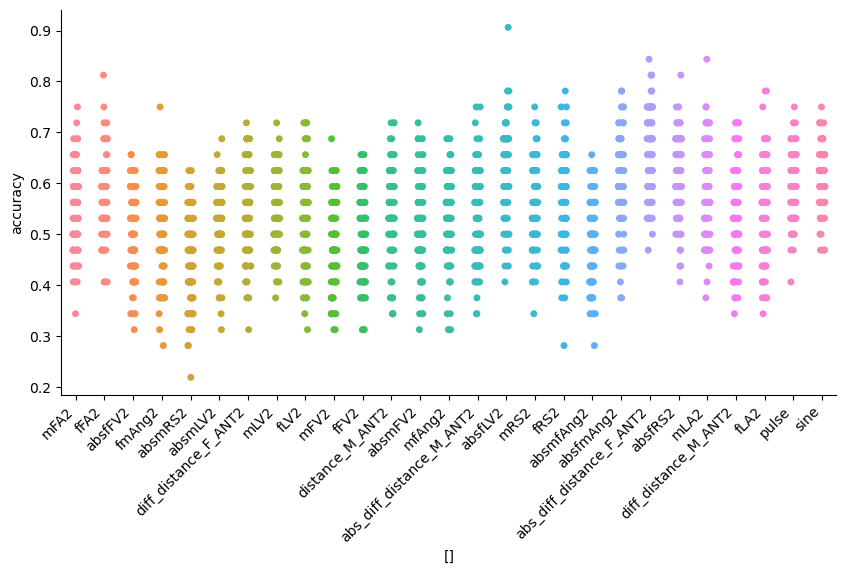

In [43]:
plt.figure(figsize=(10,5))
sns.stripplot(x='feature', y='value', data=accuracydf)
plt.xlabel([])
plt.ylabel('accuracy')
plt.xticks(rotation=45, ha='right')
sns.despine()